### Import Libraries

In [1]:
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import all_estimators
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

### Load Data

In [59]:
#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]

### Data Preprocessing

In [60]:
seed = 10
np.random.seed(seed)

Y_data = Y_data.reshape(Y_data.shape[0], 1)

idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
trainX, trainY = X_data[idx], Y_data[idx]

trainX = (trainX- np.mean(trainX, axis=0))/ np.std(trainX, axis=0)

In [61]:
# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size=0.3, random_state=11)

#Show train/test shape
print(trainX.shape, trainY.shape)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(400, 7) (400, 1)
(280, 7) (280, 1)
(120, 7) (120, 1)


# Part B1

### Declare Hyperparameter

In [5]:
#optimization hyperparameter
batch_size = 8
decay = 1e-3
lr = 1e-3
epochs = 300

#model hyperparameter
hidden_neuron = 10

### Train Model

In [6]:
# create the model

#network size = [input,10,1]
model_1 = Sequential()
model_1.add(Dense(hidden_neuron, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(decay)))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(optimizer=Adam(lr=lr),loss=MeanSquaredError(),metrics=['mse'])

#Monitor early stopping - avoid overfitting
monitor_1 = EarlyStopping(monitor='val_mse', min_delta=1e-6, patience=5, verbose=1)

#Validation
history_1 = model_1.fit(X_train, Y_train, validation_data=(X_test,Y_test), callbacks=[monitor_1], epochs=epochs, verbose=2, batch_size=batch_size)

Epoch 1/300
35/35 - 0s - loss: 0.1028 - mse: 0.0952 - val_loss: 0.0999 - val_mse: 0.0924
Epoch 2/300
35/35 - 0s - loss: 0.0765 - mse: 0.0691 - val_loss: 0.0777 - val_mse: 0.0703
Epoch 3/300
35/35 - 0s - loss: 0.0587 - mse: 0.0513 - val_loss: 0.0599 - val_mse: 0.0526
Epoch 4/300
35/35 - 0s - loss: 0.0453 - mse: 0.0380 - val_loss: 0.0467 - val_mse: 0.0395
Epoch 5/300
35/35 - 0s - loss: 0.0355 - mse: 0.0284 - val_loss: 0.0376 - val_mse: 0.0305
Epoch 6/300
35/35 - 0s - loss: 0.0289 - mse: 0.0218 - val_loss: 0.0312 - val_mse: 0.0241
Epoch 7/300
35/35 - 0s - loss: 0.0245 - mse: 0.0175 - val_loss: 0.0267 - val_mse: 0.0197
Epoch 8/300
35/35 - 0s - loss: 0.0216 - mse: 0.0146 - val_loss: 0.0235 - val_mse: 0.0166
Epoch 9/300
35/35 - 0s - loss: 0.0195 - mse: 0.0127 - val_loss: 0.0212 - val_mse: 0.0144
Epoch 10/300
35/35 - 0s - loss: 0.0179 - mse: 0.0112 - val_loss: 0.0195 - val_mse: 0.0128
Epoch 11/300
35/35 - 0s - loss: 0.0168 - mse: 0.0102 - val_loss: 0.0180 - val_mse: 0.0115
Epoch 12/300
35/35 

35/35 - 0s - loss: 0.0050 - mse: 0.0041 - val_loss: 0.0043 - val_mse: 0.0034
Epoch 93/300
35/35 - 0s - loss: 0.0050 - mse: 0.0041 - val_loss: 0.0043 - val_mse: 0.0034
Epoch 94/300
35/35 - 0s - loss: 0.0050 - mse: 0.0041 - val_loss: 0.0043 - val_mse: 0.0034
Epoch 95/300
35/35 - 0s - loss: 0.0050 - mse: 0.0041 - val_loss: 0.0043 - val_mse: 0.0034
Epoch 96/300
35/35 - 0s - loss: 0.0049 - mse: 0.0041 - val_loss: 0.0043 - val_mse: 0.0035
Epoch 97/300
35/35 - 0s - loss: 0.0050 - mse: 0.0041 - val_loss: 0.0042 - val_mse: 0.0034
Epoch 98/300
35/35 - 0s - loss: 0.0049 - mse: 0.0041 - val_loss: 0.0042 - val_mse: 0.0034
Epoch 99/300
35/35 - 0s - loss: 0.0049 - mse: 0.0041 - val_loss: 0.0042 - val_mse: 0.0034
Epoch 100/300
35/35 - 0s - loss: 0.0049 - mse: 0.0041 - val_loss: 0.0042 - val_mse: 0.0033
Epoch 101/300
35/35 - 0s - loss: 0.0049 - mse: 0.0041 - val_loss: 0.0042 - val_mse: 0.0034
Epoch 102/300
35/35 - 0s - loss: 0.0048 - mse: 0.0041 - val_loss: 0.0042 - val_mse: 0.0034
Epoch 103/300
35/35 

### Evaluate Model

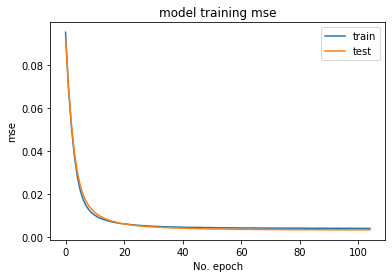

In [7]:
# plot learning curves
plt.title('model training mse')
plt.plot(history_1.history['mse'])
plt.plot(history_1.history['val_mse'])
plt.ylabel('mse')
plt.xlabel('No. epoch')
plt.legend(['train', 'test'],loc="best")
plt.show()

In [8]:
print(f"Earlystopping stop at epoch {monitor_1.stopped_epoch} to prevent overfitting")

Earlystopping stop at epoch 104 to prevent overfitting


### Prediction of 50 random sample

In [9]:
#Get 50 random value
idx = np.arange(X_test.shape[0])
np.random.shuffle(idx)
x_data, y_data = X_test[idx], Y_test[idx]
randomX = x_data[0:50]
randomY = y_data[0:50]

y_pred = model_1.predict(randomX)
print(f"{len(randomX)} Input Sample")
print(f"{len(randomY)} Labelled Sample ")
print(f"{len(y_pred)} Predicted Sample ")

50 Input Sample
50 Labelled Sample 
50 Predicted Sample 


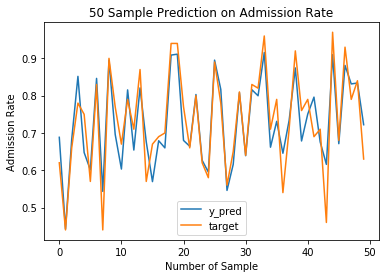

In [10]:
plt.title('50 Sample Prediction on Admission Rate')
plt.plot(y_pred, label='y_pred')
plt.plot(randomY, label='target')
plt.legend(loc="best")
plt.xlabel("Number of Sample")
plt.ylabel("Admission Rate")
plt.show()

# Part B2

In [11]:
#Use the same epochs for comparison
epochs=monitor_1.stopped_epoch+1

### sklearn multi-layer perceptron regressor do not have these attribute for RFE

In [12]:
#SKLEARN NN MLP do not have the two attribute required for RFE
for i, j in all_estimators(None):
    if getattr(j, 'feature_importances_', False) != False or getattr(j, 'coef_', False) != False:
        print(i)

AdaBoostClassifier
AdaBoostRegressor
BernoulliNB
CategoricalNB
ComplementNB
DecisionTreeClassifier
DecisionTreeRegressor
ExtraTreeClassifier
ExtraTreeRegressor
ExtraTreesClassifier
ExtraTreesRegressor
GradientBoostingClassifier
GradientBoostingRegressor
MultinomialNB
NuSVC
NuSVR
OneClassSVM
OneVsRestClassifier
RandomForestClassifier
RandomForestRegressor
RandomTreesEmbedding
SVC
SVR


### Reduce input features one by one

In [52]:
rfe_trainX, rfe_trainY = trainX, trainY

In [53]:
length = X_train.shape[1]
skmodel, selector, model, history = {}, {}, {}, {}

print("Current Shape:")
#Show train/test shape
print(trainX.shape, trainY.shape)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


for feature in range(length-1,0,-1):
    skmodel[feature] = DecisionTreeRegressor(random_state=11)
    selector[feature] = RFE(skmodel[feature], step = 1, n_features_to_select=feature, verbose=2)
    selector[feature].fit(rfe_trainX, rfe_trainY.reshape(-1,))
    
    print(f"Reduced to {feature} Features\n")
    rfe_trainX = selector[feature].transform(rfe_trainX)
    
    # split into train test sets
    rfe_X_train, rfe_X_test, rfe_Y_train, rfe_Y_test = train_test_split(rfe_trainX, rfe_trainY, test_size=0.3, random_state=11)
    
    # create the model
    #network size = [input,10,1]
    model[feature] = Sequential()
    model[feature].add(Dense(hidden_neuron, input_dim=rfe_X_train.shape[1], activation='relu', kernel_regularizer=l2(decay)))
    model[feature].add(Dense(1, activation='sigmoid'))
    model[feature].compile(optimizer=Adam(lr=lr),loss=MeanSquaredError(),metrics=['mse'])

    #Validation
    history[feature] = model[feature].fit(rfe_X_train, rfe_Y_train, validation_data=(rfe_X_test,rfe_Y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    
    print("Current Shape:")
    #Show train/test shape
    print(rfe_trainX.shape, rfe_trainY.shape)
    print(rfe_X_train.shape, rfe_Y_train.shape)
    print(rfe_X_test.shape, rfe_Y_test.shape)

Current Shape:
(400, 7) (400, 1)
(280, 7) (280, 1)
(120, 7) (120, 1)
Fitting estimator with 7 features.
Reduced to 6 Features

Current Shape:
(400, 6) (400, 1)
(280, 6) (280, 1)
(120, 6) (120, 1)
Fitting estimator with 6 features.
Reduced to 5 Features

Current Shape:
(400, 5) (400, 1)
(280, 5) (280, 1)
(120, 5) (120, 1)
Fitting estimator with 5 features.
Reduced to 4 Features

Current Shape:
(400, 4) (400, 1)
(280, 4) (280, 1)
(120, 4) (120, 1)
Fitting estimator with 4 features.
Reduced to 3 Features

Current Shape:
(400, 3) (400, 1)
(280, 3) (280, 1)
(120, 3) (120, 1)
Fitting estimator with 3 features.
Reduced to 2 Features

Current Shape:
(400, 2) (400, 1)
(280, 2) (280, 1)
(120, 2) (120, 1)
Fitting estimator with 2 features.
Reduced to 1 Features

Current Shape:
(400, 1) (400, 1)
(280, 1) (280, 1)
(120, 1) (120, 1)


### val_mse for different num of features

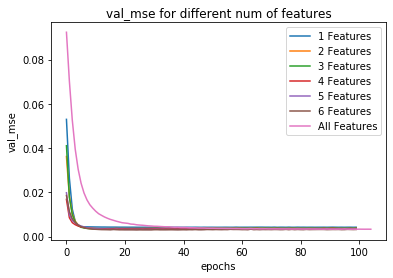

In [54]:
plt.title('val_mse for different num of features')
plt.ylabel('val_mse')
plt.xlabel('epochs')
for i in range(1,len(history)+1):
    plt.plot(history[i].history['val_mse'], label=f"{i} Features")
plt.plot(history_1.history['val_mse'], label="All Features")
plt.legend(loc="best")
plt.show()

In [55]:
for i in range(1,len(history)+1):
    print(f"{i} Features val_mse - {history[i].history['val_mse'][-1]:.6f}")
print(f"7 Features val_mse - {history_1.history['val_mse'][-1]:.6f}")

1 Features val_mse - 0.004254
2 Features val_mse - 0.003796
3 Features val_mse - 0.003831
4 Features val_mse - 0.003673
5 Features val_mse - 0.003473
6 Features val_mse - 0.003233
7 Features val_mse - 0.003349


### Comparison between all features, 6 features and 5 features

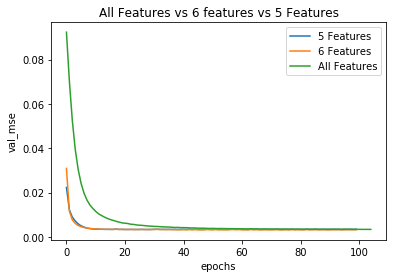

In [51]:
plt.title('All Features vs 6 features vs 5 Features')
plt.ylabel('val_mse')
plt.xlabel('epochs')
for i in range(5,len(history)+1):
    plt.plot(history[i].history['val_mse'], label=f"{i} Features")
plt.plot(history_1.history['val_mse'], label="All Features")
plt.legend(loc="best")
plt.show()

In [34]:
for i in range(5,len(history)+1):
    print(f"{i} Features val_mse - {history[i].history['val_mse'][-1]:.6f}")
print(f"7 Features val_mse - {history_1.history['val_mse'][-1]:.6f}")

5 Features val_mse - 0.003438
6 Features val_mse - 0.003140
7 Features val_mse - 0.003349


# Part B3

### Reduce to Optimal Feature Set

In [62]:
feature=6
skmodel_6f = DecisionTreeRegressor(random_state=11)
selector_6f = RFE(skmodel_6f, step = 1, n_features_to_select=feature, verbose=2)
selector_6f.fit(trainX, trainY.reshape(-1,))

print(f"Reduced to {feature} Features\n")
trainX = selector_6f.transform(trainX)

# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size=0.3, random_state=11)

Fitting estimator with 7 features.
Reduced to 6 Features



### 3-Layer NN with optimal number of features

In [76]:
epochs = 100

# create the model

#network size = [input,10,1]
model_3l = Sequential()
model_3l.add(Dense(hidden_neuron, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(decay)))
model_3l.add(Dense(1, activation='sigmoid'))
model_3l.compile(optimizer=Adam(lr=lr),loss=MeanSquaredError(),metrics=['mse'])

#Validation
history_3l = model_3l.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=epochs, verbose=2, batch_size=batch_size)

Epoch 1/100
35/35 - 0s - loss: 0.0325 - mse: 0.0224 - val_loss: 0.0206 - val_mse: 0.0106
Epoch 2/100
35/35 - 0s - loss: 0.0200 - mse: 0.0102 - val_loss: 0.0170 - val_mse: 0.0075
Epoch 3/100
35/35 - 0s - loss: 0.0175 - mse: 0.0084 - val_loss: 0.0150 - val_mse: 0.0063
Epoch 4/100
35/35 - 0s - loss: 0.0158 - mse: 0.0074 - val_loss: 0.0134 - val_mse: 0.0054
Epoch 5/100
35/35 - 0s - loss: 0.0144 - mse: 0.0067 - val_loss: 0.0122 - val_mse: 0.0047
Epoch 6/100
35/35 - 0s - loss: 0.0133 - mse: 0.0062 - val_loss: 0.0112 - val_mse: 0.0043
Epoch 7/100
35/35 - 0s - loss: 0.0125 - mse: 0.0059 - val_loss: 0.0103 - val_mse: 0.0040
Epoch 8/100
35/35 - 0s - loss: 0.0116 - mse: 0.0055 - val_loss: 0.0096 - val_mse: 0.0038
Epoch 9/100
35/35 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0090 - val_mse: 0.0036
Epoch 10/100
35/35 - 0s - loss: 0.0102 - mse: 0.0050 - val_loss: 0.0084 - val_mse: 0.0035
Epoch 11/100
35/35 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0080 - val_mse: 0.0034
Epoch 12/100
35/35 

35/35 - 0s - loss: 0.0043 - mse: 0.0039 - val_loss: 0.0037 - val_mse: 0.0032
Epoch 93/100
35/35 - 0s - loss: 0.0045 - mse: 0.0040 - val_loss: 0.0036 - val_mse: 0.0032
Epoch 94/100
35/35 - 0s - loss: 0.0044 - mse: 0.0039 - val_loss: 0.0037 - val_mse: 0.0033
Epoch 95/100
35/35 - 0s - loss: 0.0044 - mse: 0.0039 - val_loss: 0.0036 - val_mse: 0.0031
Epoch 96/100
35/35 - 0s - loss: 0.0043 - mse: 0.0039 - val_loss: 0.0036 - val_mse: 0.0031
Epoch 97/100
35/35 - 0s - loss: 0.0043 - mse: 0.0039 - val_loss: 0.0036 - val_mse: 0.0032
Epoch 98/100
35/35 - 0s - loss: 0.0043 - mse: 0.0039 - val_loss: 0.0036 - val_mse: 0.0032
Epoch 99/100
35/35 - 0s - loss: 0.0043 - mse: 0.0039 - val_loss: 0.0036 - val_mse: 0.0032
Epoch 100/100
35/35 - 0s - loss: 0.0043 - mse: 0.0039 - val_loss: 0.0036 - val_mse: 0.0032


### 4-Layer NN with optimal number of features

In [77]:
tf.random.set_seed(seed) #for Dropout
hidden_neuron = 50
lr = 1e-3
epochs=100

# create the 4 Layer NN model
model_4l = Sequential()
model_4l.add(Dense(hidden_neuron, input_dim=X_train.shape[1], activation='relu'))
model_4l.add(Dense(50, activation='relu'))
model_4l.add(Dense(1, activation='sigmoid'))
model_4l.compile(optimizer=Adam(lr=lr), loss=MeanSquaredError(), metrics=['mse'])

#Validation
history_4l = model_4l.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=epochs, verbose=2, batch_size=batch_size)

Epoch 1/100
35/35 - 0s - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 2/100
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3/100
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4/100
35/35 - 0s - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 5/100
35/35 - 0s - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 6/100
35/35 - 0s - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 7/100
35/35 - 0s - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 8/100
35/35 - 0s - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 9/100
35/35 - 0s - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 10/100
35/35 - 0s - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 11/100
35/35 - 0s - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 12/100
35/35 

35/35 - 0s - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 93/100
35/35 - 0s - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 94/100
35/35 - 0s - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 95/100
35/35 - 0s - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 96/100
35/35 - 0s - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 97/100
35/35 - 0s - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 98/100
35/35 - 0s - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 99/100
35/35 - 0s - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 100/100
35/35 - 0s - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0056 - val_mse: 0.0056


### 4-Layer NN with optimal number of features and Dropout

In [78]:
tf.random.set_seed(seed) #for Dropout
hidden_neuron = 50
lr = 1e-3

# create the 4 Layer NN model
model_4l = Sequential()
model_4l.add(Dense(hidden_neuron, input_dim=X_train.shape[1], activation='relu'))
model_4l.add(Dropout(0.2)) #Dropout on hidden layer
model_4l.add(Dense(50, activation='relu'))
model_4l.add(Dropout(0.2)) #Dropout on hidden layer
model_4l.add(Dense(1, activation='sigmoid'))
model_4l.compile(optimizer=Adam(lr=lr), loss=MeanSquaredError(), metrics=['mse'])

#Validation
history_4ld = model_4l.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=epochs, verbose=2, batch_size=batch_size)

Epoch 1/100
35/35 - 0s - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 2/100
35/35 - 0s - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 3/100
35/35 - 0s - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4/100
35/35 - 0s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 5/100
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 6/100
35/35 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 7/100
35/35 - 0s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 8/100
35/35 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 9/100
35/35 - 0s - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 10/100
35/35 - 0s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 11/100
35/35 - 0s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 12/100
35/35 

35/35 - 0s - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 93/100
35/35 - 0s - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 94/100
35/35 - 0s - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 95/100
35/35 - 0s - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 96/100
35/35 - 0s - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 97/100
35/35 - 0s - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 98/100
35/35 - 0s - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 99/100
35/35 - 0s - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 100/100
35/35 - 0s - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0038 - val_mse: 0.0038


### 5-Layer NN with optimal number of features

In [79]:
epochs=100

# create the 5 Layer NN model
model_5l = Sequential()
model_5l.add(Dense(hidden_neuron, input_dim=X_train.shape[1], activation='relu'))
model_5l.add(Dense(50, activation='relu'))
model_5l.add(Dense(50, activation='relu'))
model_5l.add(Dense(1, activation='sigmoid'))
model_5l.compile(optimizer=Adam(lr=lr), loss=MeanSquaredError(), metrics=['mse'])

history_5l = model_5l.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=epochs, verbose=2, batch_size=batch_size)

Epoch 1/100
35/35 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 2/100
35/35 - 0s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3/100
35/35 - 0s - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4/100
35/35 - 0s - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 5/100
35/35 - 0s - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 6/100
35/35 - 0s - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 7/100
35/35 - 0s - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 8/100
35/35 - 0s - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 9/100
35/35 - 0s - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 10/100
35/35 - 0s - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 11/100
35/35 - 0s - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 12/100
35/35 

Epoch 90/100
35/35 - 0s - loss: 4.3287e-04 - mse: 4.3287e-04 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 91/100
35/35 - 0s - loss: 4.0575e-04 - mse: 4.0575e-04 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 92/100
35/35 - 0s - loss: 4.1667e-04 - mse: 4.1667e-04 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 93/100
35/35 - 0s - loss: 3.8517e-04 - mse: 3.8517e-04 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 94/100
35/35 - 0s - loss: 3.8909e-04 - mse: 3.8909e-04 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 95/100
35/35 - 0s - loss: 4.0677e-04 - mse: 4.0677e-04 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 96/100
35/35 - 0s - loss: 3.7089e-04 - mse: 3.7089e-04 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 97/100
35/35 - 0s - loss: 5.2500e-04 - mse: 5.2500e-04 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 98/100
35/35 - 0s - loss: 6.4476e-04 - mse: 6.4476e-04 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 99/100
35/35 - 0s - loss: 5.3977e-04 - mse: 5.3977e-04 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 100/100
35/35 

### 5-Layer NN with optimal number of features and Dropout

In [80]:
# create the 5 Layer NN model
model_5l = Sequential()
model_5l.add(Dense(hidden_neuron, input_dim=X_train.shape[1], activation='relu'))
model_5l.add(Dropout(0.2))
model_5l.add(Dense(50, activation='relu'))
model_5l.add(Dropout(0.2))
model_5l.add(Dense(50, activation='relu'))
model_5l.add(Dropout(0.2))
model_5l.add(Dense(1, activation='sigmoid'))
model_5l.compile(optimizer=Adam(lr=lr), loss=MeanSquaredError(), metrics=['mse'])

history_5ld = model_5l.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=epochs, verbose=2, batch_size=batch_size)

Epoch 1/100
35/35 - 0s - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 2/100
35/35 - 0s - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 3/100
35/35 - 0s - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 4/100
35/35 - 0s - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 5/100
35/35 - 0s - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 6/100
35/35 - 0s - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7/100
35/35 - 0s - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 8/100
35/35 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 9/100
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 10/100
35/35 - 0s - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 11/100
35/35 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 12/100
35/35 

35/35 - 0s - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 93/100
35/35 - 0s - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 94/100
35/35 - 0s - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 95/100
35/35 - 0s - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 96/100
35/35 - 0s - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 97/100
35/35 - 0s - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 98/100
35/35 - 0s - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 99/100
35/35 - 0s - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 100/100
35/35 - 0s - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0044 - val_mse: 0.0044


### Mean Square Error results for different network

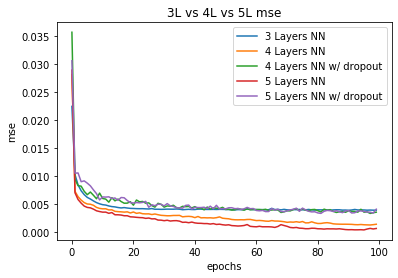

In [81]:
plt.title('3L vs 4L vs 5L mse')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.plot(history_3l.history['mse'], label="3 Layers NN")
plt.plot(history_4l.history['mse'], label="4 Layers NN")
plt.plot(history_4ld.history['mse'], label="4 Layers NN w/ dropout")
plt.plot(history_5l.history['mse'], label="5 Layers NN")
plt.plot(history_5ld.history['mse'], label="5 Layers NN w/ dropout")
plt.legend(loc="best")
plt.show()

### Validation Error results for different network

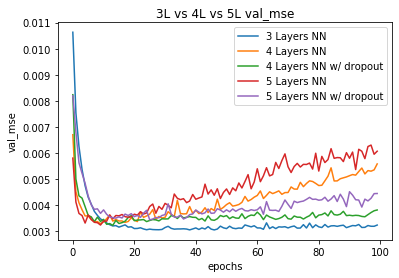

In [82]:
plt.title('3L vs 4L vs 5L val_mse')
plt.ylabel('val_mse')
plt.xlabel('epochs')
plt.plot(history_3l.history['val_mse'], label="3 Layers NN")
plt.plot(history_4l.history['val_mse'], label="4 Layers NN")
plt.plot(history_4ld.history['val_mse'], label="4 Layers NN w/ dropout")
plt.plot(history_5l.history['val_mse'], label="5 Layers NN")
plt.plot(history_5ld.history['val_mse'], label="5 Layers NN w/ dropout")
plt.legend(loc="best")
plt.show()

### Final val_mse

In [85]:
print(history_3l.history['val_mse'][-1])
print(history_4l.history['val_mse'][-1])
print(history_4ld.history['val_mse'][-1])
print(history_5l.history['val_mse'][-1])
print(history_5ld.history['val_mse'][-1])

0.003235448384657502
0.005580538418143988
0.0038139086682349443
0.006068325135856867
0.004446250852197409
